### Importing libraries & dataset

In [56]:
import numpy as np
import pandas as pd

In [57]:
data = pd.read_csv('data/Salary_Data.csv')

In [58]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [60]:
print(f'Shape of the dataset (rows, cols): {data.shape}')

Shape of the dataset (rows, cols): (30, 2)


### Defining Training and Test Patterns

In [61]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1]

# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)

Shape of the input features: (30, 1)
Shape of the output features: (30,)


In [62]:
#define training & test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Checking the shape of the training and test sets
print('Shape of the training data:', X_train.shape)

print('Shape of the test data:', y_train.shape)



Shape of the training data: (20, 1)
Shape of the test data: (20,)


### Fitting the Simple Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression

#define the model
regressorModel = LinearRegression()

Once the model is defined, we will train it with training set we have.

In [64]:
regressorModel.fit(X_train, y_train)

LinearRegression()

As the model finishes training, we check important parameters of the fitted model.

In [65]:
# The regression coefficient (w)
print('The regression coefficient: ', regressorModel.coef_[0])

The regression coefficient:  9345.942443122372


In [66]:
# The intercept (b)
print('The intercept', regressorModel.intercept_)

The intercept 26816.192244031183


Our linear regression equation is: 

In [67]:
print(f'y = {regressorModel.intercept_} + {regressorModel.coef_[0]} * x')

y = 26816.192244031183 + 9345.942443122372 * x


### Making Predictions on the Test Data

In [68]:
# Making predictions on the test data
y_pred = regressorModel.predict(X_test)

In [69]:
len(y_pred)

10

In [70]:
preview = pd.DataFrame({
    'Predicted Salary':y_pred,
    'Actual Salary':y_test
})
preview

,Predicted Salary,Actual Salary
2,40835.105909,37731.0
28,123079.399408,122391.0
13,65134.556261,57081.0
10,63265.367772,63218.0
26,115602.645454,116969.0
24,108125.891499,109431.0
27,116537.239698,112635.0
11,64199.962017,55794.0
17,76349.687193,83088.0
22,100649.137545,101302.0


### Evaluating the prediction performance

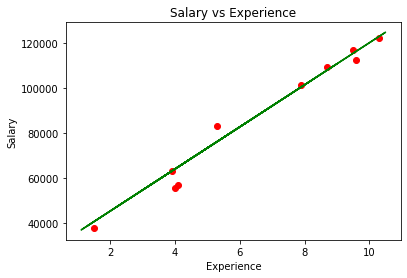

In [71]:
# Visualizing the fitted regression line against the predicted values
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='red') #dots for predicted values

plt.plot(X_train, regressorModel.predict(X_train), color='green') #regression line

plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

- As we can notice, the regression line looks closer to the predicted values.
- There's still a distance between the line & the dots, that's called `prediction error`.

In [72]:
# MSE
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is: ', MSE)

Mean Squared Error is:  21026037.329511296


In [73]:
# Root mean squared error
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is: ', RMSE)

Root Mean Squared Error is:  4585.4157204675885


In [74]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)


R-Squared is: 0.9749154407708353


#### Results:
As we can see above, the value of R-squared is very neat to 1 and that indicates this is the best fit model.